In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
import tensorflow_datasets as tfds

In [ ]:
class CNNBlock(tf.keras.Model):
  def __init__(self,filters,kernel_size):
    super(CNNBlock,self).__init__(name='')

    self.conv1 = tf.keras.layers.Conv2D(filters,kernel_size,padding='same')
    self.bn1 = tf.keras.layers.BatchNormalization()

    self.conv2 = tf.keras.layers.Conv2D(filters,kernel_size,padding='same')
    self.bn2 = tf.keras.layers.BatchNormalization()

    self.act = tf.keras.layers.Activation('relu')
    self.add = tf.keras.layers.Add()

  def call(self,input_tensor):
    x = self.conv1(input_tensor)
    x = self.bn1(x)
    x = self.act(x)

    x = self.conv2(x)
    x = self.bn2(x)
    x = self.act(x)

    x = self.add([x,input_tensor])
    x = self.act(x)
    return x


In [ ]:
class Resnet(tf.keras.Model):
  def __init__(self,num_classes):
    super(Resnet,self).__init__()
    self.conv = tf.keras.layers.Conv2D(64,(7,7),padding='same')
    self.bn = tf.keras.layers.BatchNormalization()
    self.act = tf.keras.layers.Activation('relu')
    self.max_pool = tf.keras.layers.MaxPool2D((3,3))
    self.block1 = CNNBlock(64,(3,3))
    self.block2 = CNNBlock(64,(3,3))
    self.global_avg = tf.keras.layers.GlobalAveragePooling2D()
    self.classifier = tf.keras.layers.Dense(num_classes,activation='softmax')

  def call(self,inputs):
    x = self.conv(inputs)
    x = self.bn(x)
    x = self.act(x)
    x = self.max_pool(x)
    x = self.block1(x)
    x = self.block2(x)
    x = self.global_avg(x)
    return self.classifier(x)

In [ ]:
resnet = Resnet(10)
def preprocess(features):
  return tf.cast(features['image'],tf.float32)/255.,features['label']
data = tfds.load('mnist',split=tfds.Split.TRAIN)
data = data.map(preprocess).batch(32)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
resnet.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
resnet.fit(data,batch_size=512,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 56s 14ms/step - loss: 0.3116 - accuracy: 0.9243
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0556 - accuracy: 0.9838
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0393 - accuracy: 0.9885
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0299 - accuracy: 0.9914
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0244 - accuracy: 0.9932
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0205 - accuracy: 0.9944
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0168 - accuracy: 0.9953
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0170 - accuracy: 0.9945
Epoch 9/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0135 - accuracy: 0.9961
Epoch 10/10
1875/1875 [==============================] - 21s 11m

In [ ]:
from keras_preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

The number is:  8 



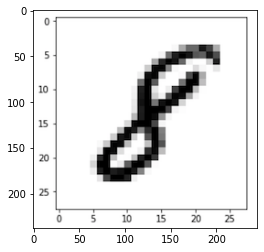

In [ ]:
x = image.load_img('/content/1_nlfLUgHUEj5vW7WVJpxY-g.png', target_size=(28, 28))
x = image.img_to_array(x)
x = tf.image.rgb_to_grayscale(x)
x = np.expand_dims(x, axis=0)
x = x/255.0
ypred = resnet.predict(x)
number = np.argmax(ypred)
print('The number is: ',number,'\n')

img = plt.imread('/content/1_nlfLUgHUEj5vW7WVJpxY-g.png')
plt.imshow(img)